6. Calculate the yield of the areas N-9.1, N-9.2, N-9.3 without external effects. Use the long-term corrected ERA5 data as 
input. 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import foxes
import foxes.variables as FV

# Data Paths
lidar_path = 'data/measurements/'
era5_path = 'data/reanalysis/'
turbines_existing_path = 'data/turbine-info/coordinates/existing/'
turbines_planned_future_path = 'data/turbine-info/coordinates/planned_future/'
turbines_planned_in_operation_before_2030_path = 'data/turbine-info/coordinates/planned_in_operation_before_2030/'
turbines_planned_netherlands_path = 'data/turbine-info/coordinates/planned_netherlands/'
turbines_area_of_interest_path = 'data/turbine-info/coordinates/area_of_interest/'
shapefiles_DEU_path = 'data/shapefiles/DEU/*'
shapefiles_DNK_path = 'data/shapefiles/DNK/*'
shapefiles_NLD_path = 'data/shapefiles/NLD/*'
turbine_power_curves_path = 'data/turbine-info/power_curves/'

# Function to read and extract data from csv files
def read_csv(path):
    data = pd.read_csv(path)
    return data

In [2]:
data = pd.read_csv('LT_corrected_buoy6.csv', index_col=0)
data.index = pd.to_datetime(data.index)

data_2023 = data[data.index.year == 2023]

data_2023

,long-term_WS150,long-term_WD150
time,,
2023-01-01 00:00:00,21.579621,225.517803
2023-01-01 01:00:00,21.616580,231.363431
2023-01-01 02:00:00,19.990306,231.284592
2023-01-01 03:00:00,19.547231,232.026783
2023-01-01 04:00:00,18.286222,230.613454
...,...,...
2023-12-31 19:00:00,17.698616,179.283877
2023-12-31 20:00:00,17.441924,184.611145
2023-12-31 21:00:00,16.943322,187.576282


## Task6: Compute Power for gem.Layout without external wake effects 

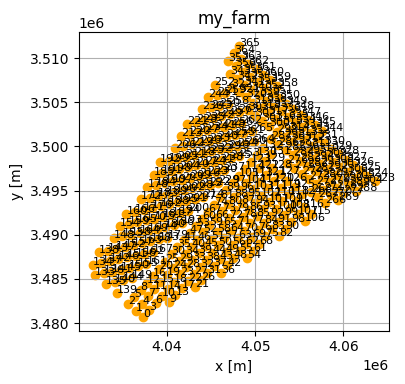

Calculating wind farm power for gem.Layout N9 Cluster for Wake Model: ['Bastankhah2014_linear']:
[########################################] | 100% Completed | 128.34 ms
[########################################] | 100% Completed | 16m 8ss
Efficiency added to farm results


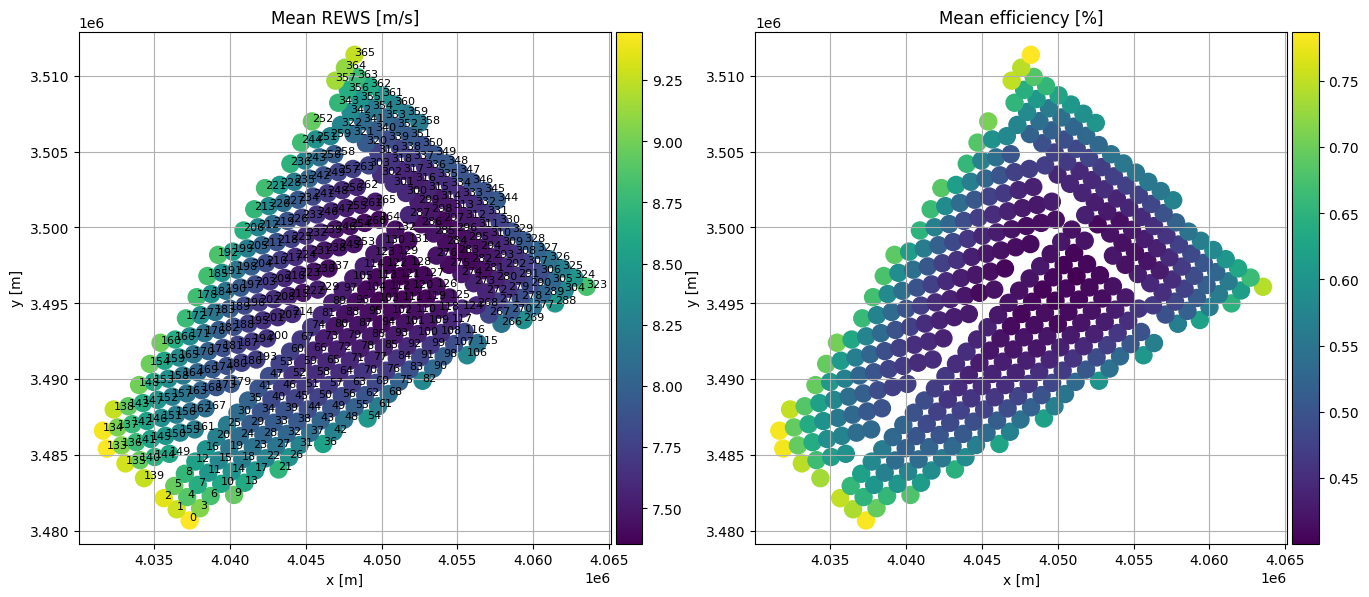

Summary Results:                        Farm power [MW]  Farm ambient power [MW]  \
gem.Layout N9 Cluster      2219.096525              3460.826877   

                       Farm efficiency [%]  Annual farm yield [TWh]  
gem.Layout N9 Cluster            64.120414                19.439286  


In [3]:
from Foxes_Farm_Power import Foxes_Farm_Power

###-------------------------------------get Turbine Layouts----------------------------------###
# get the layout we generated in Task 5 by loading the .csv files
Areas = ['N-9.1','N-9.2','N-9.3'] 
Layout_Path = ["NoWake_Layout_" + area + ".csv" for area in Areas]
Layout_dfs = [read_csv(file) for file in Layout_Path]                #list of dataframes

geo_Cluster_Turb_df = pd.concat([Layout_dfs[0],Layout_dfs[1],Layout_dfs[2]], ignore_index=True)
geo_Cluster_Turb_df = [geo_Cluster_Turb_df, "gem.Layout N9 Cluster"]   # with name to pass to Funktion
###--------------------------------------Important Parameters---------------------------------------###
Parameters = dict(                              # passed to the foxes.algorithms.Downwind()
    TType         = "IEA15MW",                  #"NREL5MW","IEA15MW"
    rotor_model   = "centre",
    wake_models   = ["Bastankhah2014_linear"],
    partial_wakes = None,
    )
###----------------------------------------Add States-----------------------------------------###
# define States as Foxes object and have a look at the wind rose.
# Wind and other atmospheric inflow conditions are called `States`
States = foxes.input.states.Timeseries(                      # StatesTable for panda df or pd readable file (single height)
    data_source = data_2023 ,                                         # the data
    output_vars = [FV.WS, FV.WD, FV.TI, FV.RHO],
    var2col =     {FV.WS: "long-term_WS150", FV.WD: "long-term_WD150", FV.TI: "time"}, # Mapping from variable names to data column names
    fixed_vars =  {FV.RHO: 1.225, FV.TI: 0.05},                  # TI = Turbulanze Intensity %5 default
    )

###--------------------------------------compute farm results--------------------------------------###

                                                    # the previous results we add to 
result_all_farms = Foxes_Farm_Power(geo_Cluster_Turb_df,States,Parameters)         # run the function
all_results_inter_wakes = result_all_farms[0]
turb_results_inter_wakes = result_all_farms[1]
print(f'Summary Results: {all_results_inter_wakes}')
all_results_inter_wakes.to_csv('yield_N9-1-3_internal_wakes.csv')

## Task 7: Use 3 other wake models to caclculate the farm yield

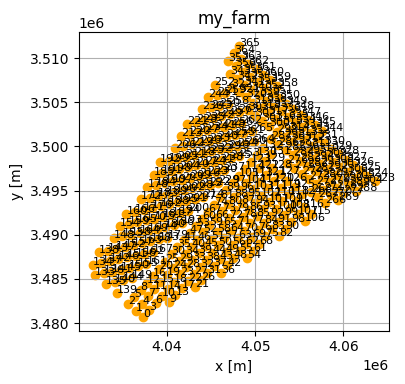

Calculating wind farm power for gem.Layout N9 Cluster for Wake Model: ['TurbOPark_linear']:
[########################################] | 100% Completed | 107.65 ms
[########################################] | 100% Completed | 16m 25s
Efficiency added to farm results


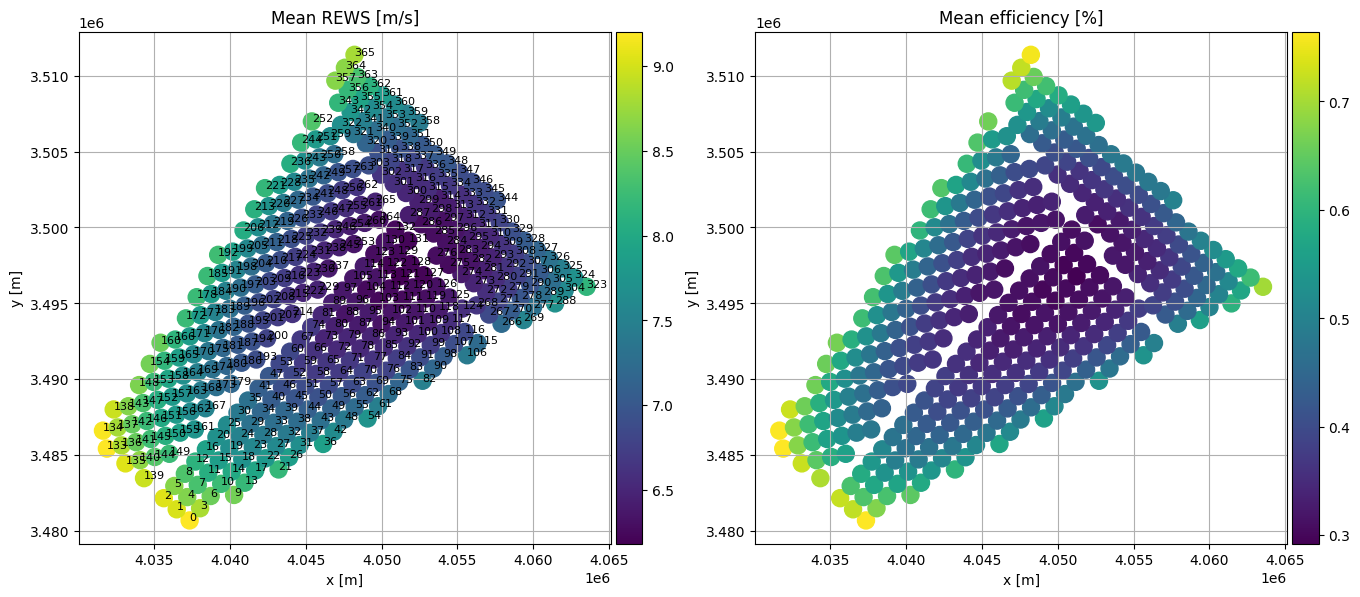

Summary Results:                        Farm power [MW]  Farm ambient power [MW]  \
gem.Layout N9 Cluster      1951.280131              3460.826877   

                       Farm efficiency [%]  Annual farm yield [TWh]  
gem.Layout N9 Cluster            56.381905                17.093214  


In [4]:
###--------------------------------------Important Parameters---------------------------------------###
Parameters = dict(                              # passed to the foxes.algorithms.Downwind()
    TType         = "IEA15MW",                  #"NREL5MW","IEA15MW"
    rotor_model   = "centre",
    wake_models   = ["TurbOPark_linear"],
    partial_wakes = None,
    )
result_all_farms_Turb0Park = Foxes_Farm_Power(geo_Cluster_Turb_df,States,Parameters)         # run the function
all_res_inter_wa_Turb0 = result_all_farms_Turb0Park[0]
turb_res_inter_wa_Turb0 = result_all_farms_Turb0Park[1]
print(f'Summary Results: {all_res_inter_wa_Turb0}')
all_res_inter_wa_Turb0.to_csv('yield_N9-1-3_internal_wakes_Turb0Park.csv')



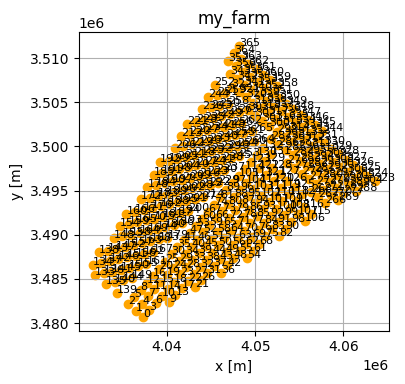

Calculating wind farm power for gem.Layout N9 Cluster for Wake Model: ['Jensen_linear']:
[########################################] | 100% Completed | 107.53 ms
[########################################] | 100% Completed | 161.85 s
Efficiency added to farm results


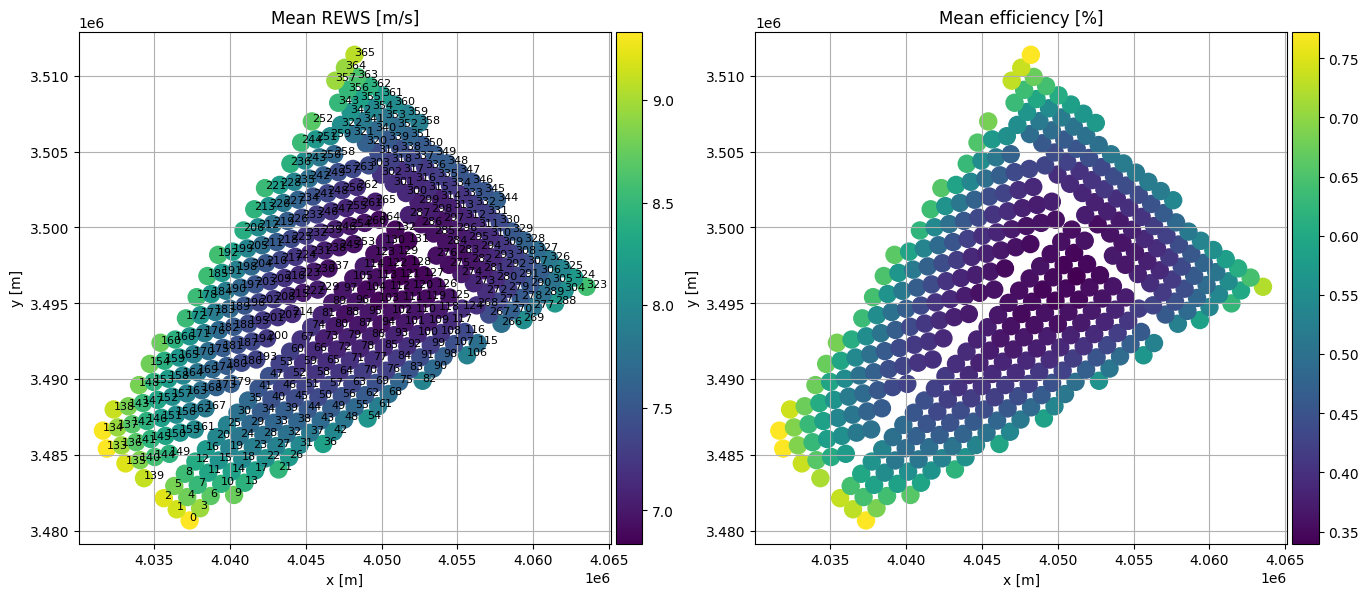

Summary Results:                        Farm power [MW]  Farm ambient power [MW]  \
gem.Layout N9 Cluster      2100.098621              3460.826877   

                       Farm efficiency [%]  Annual farm yield [TWh]  
gem.Layout N9 Cluster             60.68199                18.396864  


In [5]:
###--------------------------------------Important Parameters---------------------------------------###
Parameters = dict(                              # passed to the foxes.algorithms.Downwind()
    TType         = "IEA15MW",                  #"NREL5MW","IEA15MW"
    rotor_model   = "centre",
    wake_models   = ["Jensen_linear"],
    partial_wakes = None,
    )
result_all_farms_Jensen = Foxes_Farm_Power(geo_Cluster_Turb_df,States,Parameters)         # run the function
all_res_inter_wa_Jens = result_all_farms_Jensen[0]
turb_res_inter_wa_Jens = result_all_farms_Jensen[1]
print(f'Summary Results: {all_res_inter_wa_Jens}')
all_res_inter_wa_Jens.to_csv('yield_N9-1-3_internal_wakes_Jensen.csv')

## Task 8: Calculate Farm Yield with internal and external wake effects 


In [8]:
import pandas as pd

# Function to group by month and calculate the mean
def group_month_and_calc_mean(df):
    df = df.copy()  # Ensure you're working with a copy of the DataFrame
    df.index = pd.to_datetime(df.index)
    df.loc[:, 'year'] = df.index.year  # Use .loc to avoid the SettingWithCopyWarning
    df_month_mean = df.groupby('year').mean()
    return df_month_mean

# Example usage:
# Assuming data_2023 is your DataFrame with a DatetimeIndex
# daily_mean_data = data_2023.resample('D').mean()
# daily_mean_data
df_month_mean = group_month_and_calc_mean(data_2023)
df_month_mean


,long-term_WS150,long-term_WD150
year,,
2023,10.239453,206.499406


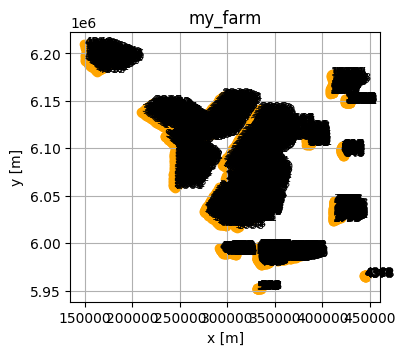

Calculating wind farm power for Combined_Cluster for Wake Model: ['Bastankhah2014_linear']:
[########################################] | 100% Completed | 104.28 ms
[########################################] | 100% Completed | 48.22 s
Efficiency added to farm results


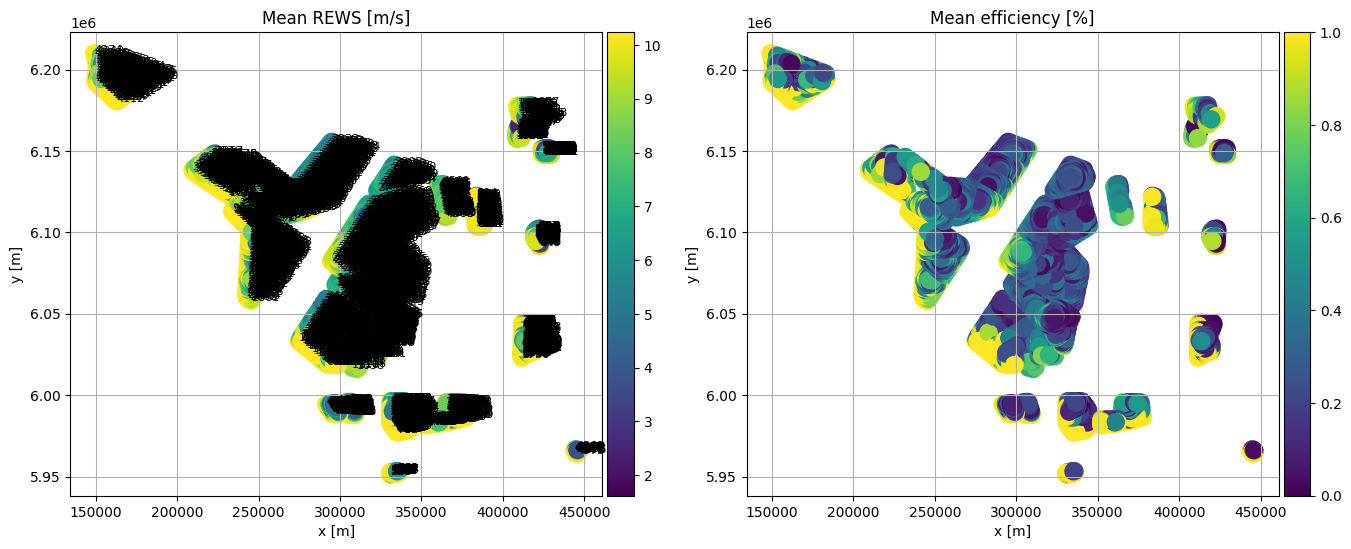

In [20]:
from Foxes_Farm_Power import Foxes_Farm_Power

# Paths
turbines_area_of_interest_path = 'data/turbine-info/coordinates/area_of_interest/'
external_farms_path = 'data/turbine-info/coordinates/existing_planned/'

# Read internal turbine layout files
internal_files = os.listdir(turbines_area_of_interest_path) # List all files in the directory
Turb_dfs = [pd.read_csv(turbines_area_of_interest_path + file) for file in internal_files]
Cluster_Turb_df = pd.concat(Turb_dfs, ignore_index=True)

# Read external turbine layout files
external_files = os.listdir(external_farms_path)
external_dfs = [pd.read_csv(external_farms_path + file) for file in external_files]
external_combined_df = pd.concat(external_dfs, ignore_index=True)

# Combine internal and external layouts for wake effect calculation
combined_df = pd.concat([Cluster_Turb_df, external_combined_df], ignore_index=True)
Combined_Turb_df = (combined_df, "Combined_Cluster")

# Define States using a valid data source
States = foxes.input.states.Timeseries(
    data_source= df_month_mean,
    output_vars=[FV.WS, FV.WD, FV.TI, FV.RHO],
    var2col={FV.WS: "long-term_WS150", FV.WD: "long-term_WD150", FV.TI: "time"},
    fixed_vars={FV.RHO: 1.225, FV.TI: 0.05},
)

# Define Parameters
Parameters = {
    'TType': "IEA15MW",
    'rotor_model': "centre",
    'wake_models': ["Bastankhah2014_linear"],
    'partial_wakes': None,
}

# Calculate the farm results with wake effects
combined_results = Foxes_Farm_Power(Combined_Turb_df, States, Parameters)

In [26]:
# combined_results contains the two DataFrames in a tuple
summary_results = combined_results[0]
turbine_results = combined_results[1]

# Display the summary results DataFrame
print("Summary Results:")
print(summary_results)

# Display the turbine results DataFrame
print("Turbine Results:")
print(turbine_results)

# Extract the results for the farm of interest (Cluster_Turb_df)
matched_turbines = turbine_results.merge(Cluster_Turb_df, left_on=['X', 'Y'], right_on=['x', 'y'])

matched_turbines.drop(['x', 'y'] ,axis=1)

N9_farm_yield = (matched_turbines['YLD'].sum())/1000 #TWh 
print(f'Annual farm yield with external effects: {N9_farm_yield:.2f} TWh')

summary_results.to_csv('yield_N9-1-3_external_wakes.csv')
matched_turbines.to_csv('yield_N9-1-3_external_wake_turb.csv')

Summary Results:
                  Farm power [MW]  Farm ambient power [MW]  \
Combined_Cluster     23873.742513             63916.981803   

                  Farm efficiency [%]  Annual farm yield [TWh]  
Combined_Cluster            37.351173               209.133984  
Turbine Results:
             REWS             P              X             Y        YLD
turbine                                                                
0        3.469196    316.327989  293224.824041  6.040366e+06   2.771033
1        6.938021   4234.689847  291184.824041  6.036526e+06  37.095883
2        9.378599  10528.350838  288784.824041  6.032566e+06  92.228353
3        4.313105    856.129239  298024.824041  6.043846e+06   7.499692
4        7.691500   5820.193192  293944.824041  6.043486e+06  50.984892
...           ...           ...            ...           ...        ...
4830     4.788618   1252.707725  298294.591619  5.992610e+06  10.973720
4831     4.877374   1326.729722  298120.509700  5.993207e+06  1